In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df=pd.read_csv('Algerian_forest_fire_cleaned_dataset.csv')

In [18]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [20]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [21]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [22]:
df['Classes'].value_counts()

fire        137
not fire    105
Name: Classes, dtype: int64

In [23]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [24]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
241,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [25]:
df['Classes'].value_counts()

1    137
0    105
Name: Classes, dtype: int64

In [26]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [27]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [29]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
237    6.5
238    0.0
239    0.2
240    0.7
241    0.5
Name: FWI, Length: 242, dtype: float64

In [30]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [31]:
X_train.shape,X_test.shape

((181, 11), (61, 11))

In [32]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650224,-0.302732,-0.331330,0.700839,0.492037,0.375474,0.615496,0.464129,0.522840,0.252817
RH,-0.650224,1.000000,0.261863,0.234843,-0.634752,-0.415755,-0.248036,-0.694912,-0.366061,-0.437528,-0.361070
Ws,-0.302732,0.261863,1.000000,0.218266,-0.160435,0.004681,0.108473,0.010214,0.042850,-0.055013,-0.238681
Rain,-0.331330,0.234843,0.218266,1.000000,-0.543097,-0.287984,-0.301446,-0.347243,-0.299119,-0.388459,-0.063286
FFMC,0.700839,-0.634752,-0.160435,-0.543097,1.000000,0.625312,0.541806,0.754240,0.614940,0.785837,0.212865
DMC,0.492037,-0.415755,0.004681,-0.287984,0.625312,1.000000,0.876910,0.694281,0.983730,0.614165,0.195368
DC,0.375474,-0.248036,0.108473,-0.301446,0.541806,0.876910,1.000000,0.550014,0.947056,0.546969,-0.082197
ISI,0.615496,-0.694912,0.010214,-0.347243,0.754240,0.694281,0.550014,1.000000,0.660535,0.750762,0.263717
BUI,0.464129,-0.366061,0.042850,-0.299119,0.614940,0.983730,0.947056,0.660535,1.000000,0.610301,0.095429
Classes,0.522840,-0.437528,-0.055013,-0.388459,0.785837,0.614165,0.546969,0.750762,0.610301,1.000000,0.161852


## Feature Selection

<Axes: >

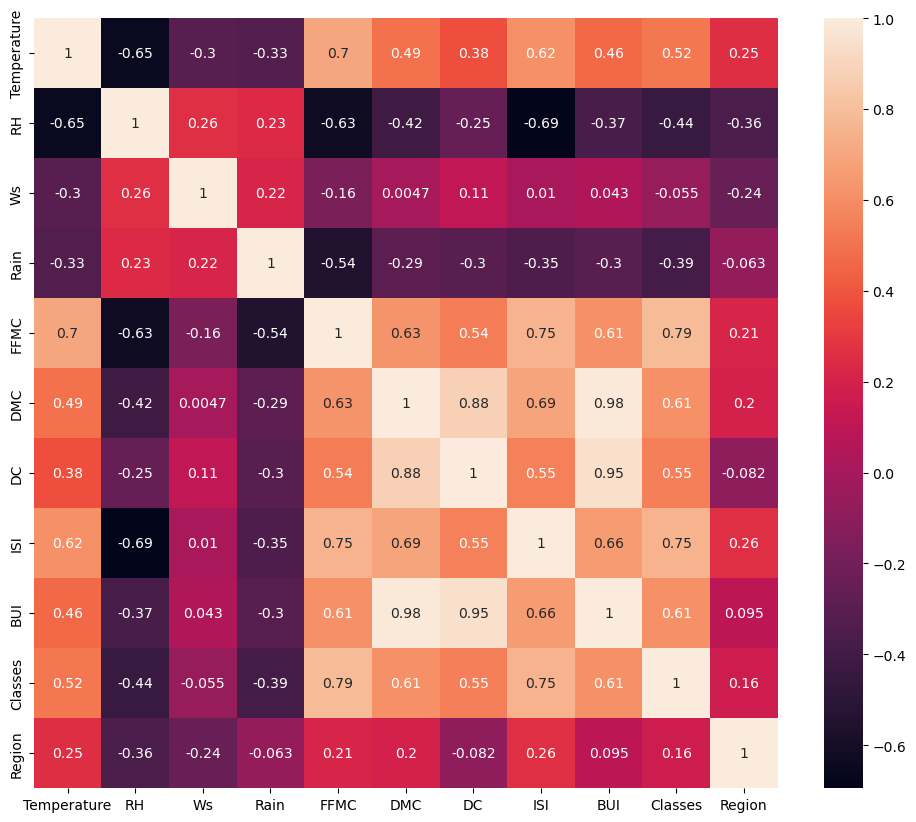

In [33]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [34]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650224,-0.302732,-0.331330,0.700839,0.492037,0.375474,0.615496,0.464129,0.522840,0.252817
RH,-0.650224,1.000000,0.261863,0.234843,-0.634752,-0.415755,-0.248036,-0.694912,-0.366061,-0.437528,-0.361070
Ws,-0.302732,0.261863,1.000000,0.218266,-0.160435,0.004681,0.108473,0.010214,0.042850,-0.055013,-0.238681
Rain,-0.331330,0.234843,0.218266,1.000000,-0.543097,-0.287984,-0.301446,-0.347243,-0.299119,-0.388459,-0.063286
FFMC,0.700839,-0.634752,-0.160435,-0.543097,1.000000,0.625312,0.541806,0.754240,0.614940,0.785837,0.212865
DMC,0.492037,-0.415755,0.004681,-0.287984,0.625312,1.000000,0.876910,0.694281,0.983730,0.614165,0.195368
DC,0.375474,-0.248036,0.108473,-0.301446,0.541806,0.876910,1.000000,0.550014,0.947056,0.546969,-0.082197
ISI,0.615496,-0.694912,0.010214,-0.347243,0.754240,0.694281,0.550014,1.000000,0.660535,0.750762,0.263717
BUI,0.464129,-0.366061,0.042850,-0.299119,0.614940,0.983730,0.947056,0.660535,1.000000,0.610301,0.095429
Classes,0.522840,-0.437528,-0.055013,-0.388459,0.785837,0.614165,0.546969,0.750762,0.610301,1.000000,0.161852


In [35]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [37]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [38]:
corr_features

{'BUI', 'DC'}

In [39]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((181, 9), (61, 9))

## Feature Scaling Or Standardization

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [41]:
X_train_scaled

array([[-0.83204305,  0.74984413,  1.27359309, ..., -0.603514  ,
        -1.07459849, -0.98356052],
       [-0.03098033, -0.52548424, -0.51616117, ...,  0.08320722,
         0.93058013,  1.01671425],
       [-0.83204305, -1.46519989, -2.66386629, ..., -0.46143375,
         0.93058013,  1.01671425],
       ...,
       [-1.90012668,  0.88408923,  0.55769138, ..., -1.0534348 ,
        -1.07459849, -0.98356052],
       [ 1.03710331, -0.4583617 ,  0.19974053, ...,  0.84096857,
         0.93058013,  1.01671425],
       [-0.56502214,  0.95121177,  1.9894948 , ..., -0.84031442,
        -1.07459849, -0.98356052]])

## Box Plots To understand Effect Of Standard Scaler

C:\Users\User\AppData\Local\Temp\ipykernel_23500\160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

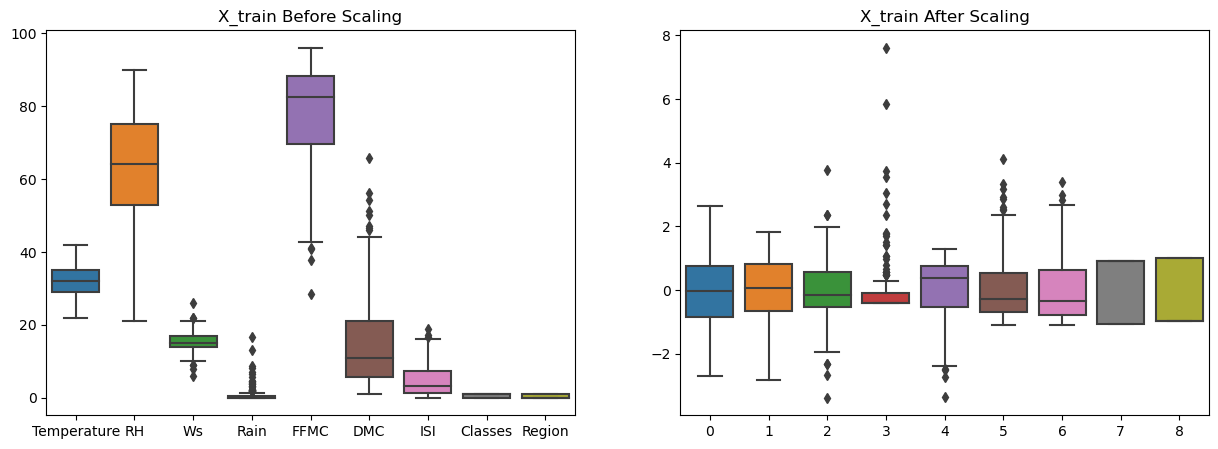

In [42]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression Model

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.581770171316464
R2 Score 0.9834796381381271


## Lasso Regression

In [46]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.1505124527609651
R2 Score 0.94952189154963


## Ridge Regression model

In [47]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.6101663695274607
R2 Score 0.9826607384732664


## Elasticnet Regression

In [48]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.8989989216458465
R2 Score 0.8725377345036658


In [49]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))